Finished [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html).

The following section is just left from the last section ([3.6. scikit-learn: machine learning in Python](http://www.scipy-lectures.org/packages/scikit-learn/index.html)).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
data.data.shape

(506, 13)

In [4]:
data.target.shape

(506,)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

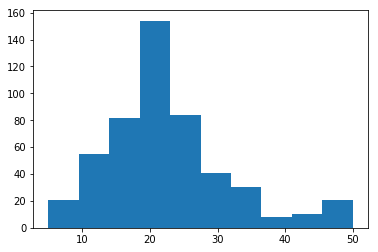

In [5]:
plt.hist(data.target)

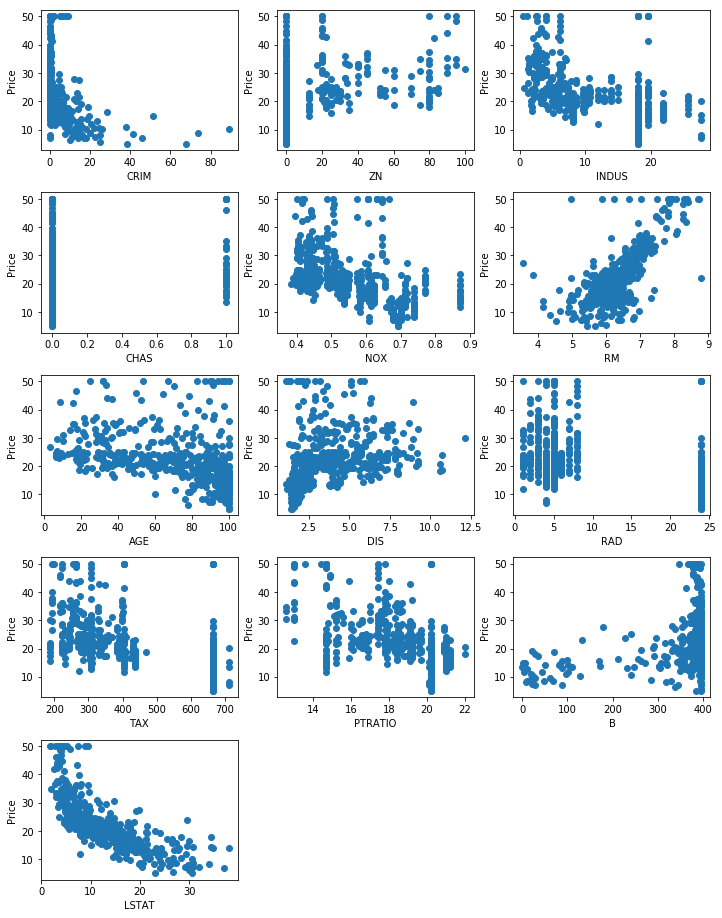

In [6]:
# for index, feature_name in enumerate(data.feature_names):
#     plt.figure(figsize=(4, 3))
#     plt.scatter(data.data[:, index], data.target)
#     plt.ylabel('Price', size=15)
#     plt.xlabel(data.feature_names[index], size=15)
#     plt.tight_layout()

figsize_scale = 4
figure = plt.figure(figsize=(3*figsize_scale, 4*figsize_scale))
figure.subplots_adjust(hspace=0.3)
number_of_colums = 3
number_of_rows = (len(data.feature_names)//number_of_colums) + 1

for index, feature_name in enumerate(data.feature_names):
    axes = figure.add_subplot(
        number_of_rows,
        number_of_colums,
        index + 1)
    axes.scatter(data.data[:, index], data.target)
    axes.set_ylabel('Price')
    axes.set_xlabel(data.feature_names[index])

Text(0,0.5,'Predicted price ($1000s)')

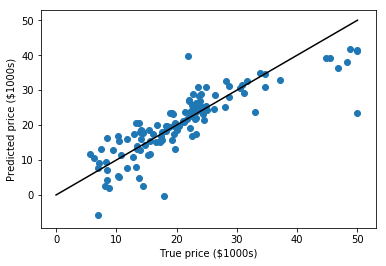

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test


plt.plot([0, 50], [0, 50], 'k')
plt.scatter(expected, predicted)
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')